# 6.5 - Regresyon Problemleri ve Lineer Regresyon Modeli: Modelin Eğitim Performansını Ölçme

## 1 - Modelimiz "boş" modelden daha mı iyi?
The F-test can be calculated in different ways depending on the situation, but principally represents the ratio between the **unexplained variance of our model** and the **unexplained variance of a reduced model** to which our model is compared. Here, the "reduced model" is a model with no features, meaning all variance in the outcome is unexplained. For a linear regression model with two parameters $y = \alpha + \beta x$, the F-test is built from these pieces:<br>

* unexplained model variance:<br>
$SSE_F = \sum(y_i - \hat{y}_i)^2$


* unexplained variance in reduced model:<br>
$SSE_R = Var_y = \sum(y_i - \bar{y})^2$


* number of parameters in the model:<br>
$p_F = 2(\alpha \text{ and } \beta)$


* number of parameters in the reduced model:<br>
$p_R = 1(\alpha)$


* number of observations:<br>
$n$


* degrees of freedom of $SSE_F$:<br>
$df_F = n - p_F$


* degrees of freedom of $SSE_R$:<br>
$df_R = n - p_R$


...and the F-test is:<br>

$F = \dfrac{SSE_F - SSE_R}{df_F - df_R} \div \dfrac{SSE_F}{df_F}$

**Degrees of freedom** quantify the amount of information "left over" to estimate variability after all parameters are estimated. Regresyonda, bir fonksiyon için serbestlik derecesi şöyle çalışır: İki veri noktası ile, bir regresyon çizgisi $y = \alpha + \beta x$ , 0 derece serbestliğe (2 eksi parametre sayısı) sahiptir. Bu iki parametre, verilerdeki tüm bilgileri kapsamaktadır. Tek başına α ve β 'yı biliyorsak, orijinal verileri mükemmel bir şekilde yeniden üretebiliriz. Verilerin kendisinden ek bilgi gelmez. Eğer 10 veri noktamız varsa, o zaman modelin serbestlik derecesi 8'dir (10 eksi parametre sayısı). F-testinin null hipotezleri modelin indirgenmiş modelden ayırt edilemez olduğunu belirtmektedir, bu da özelliklerin hedef değişkenin açıklanmasına hiçbir katkı sağlamayacağı anlamına gelir.

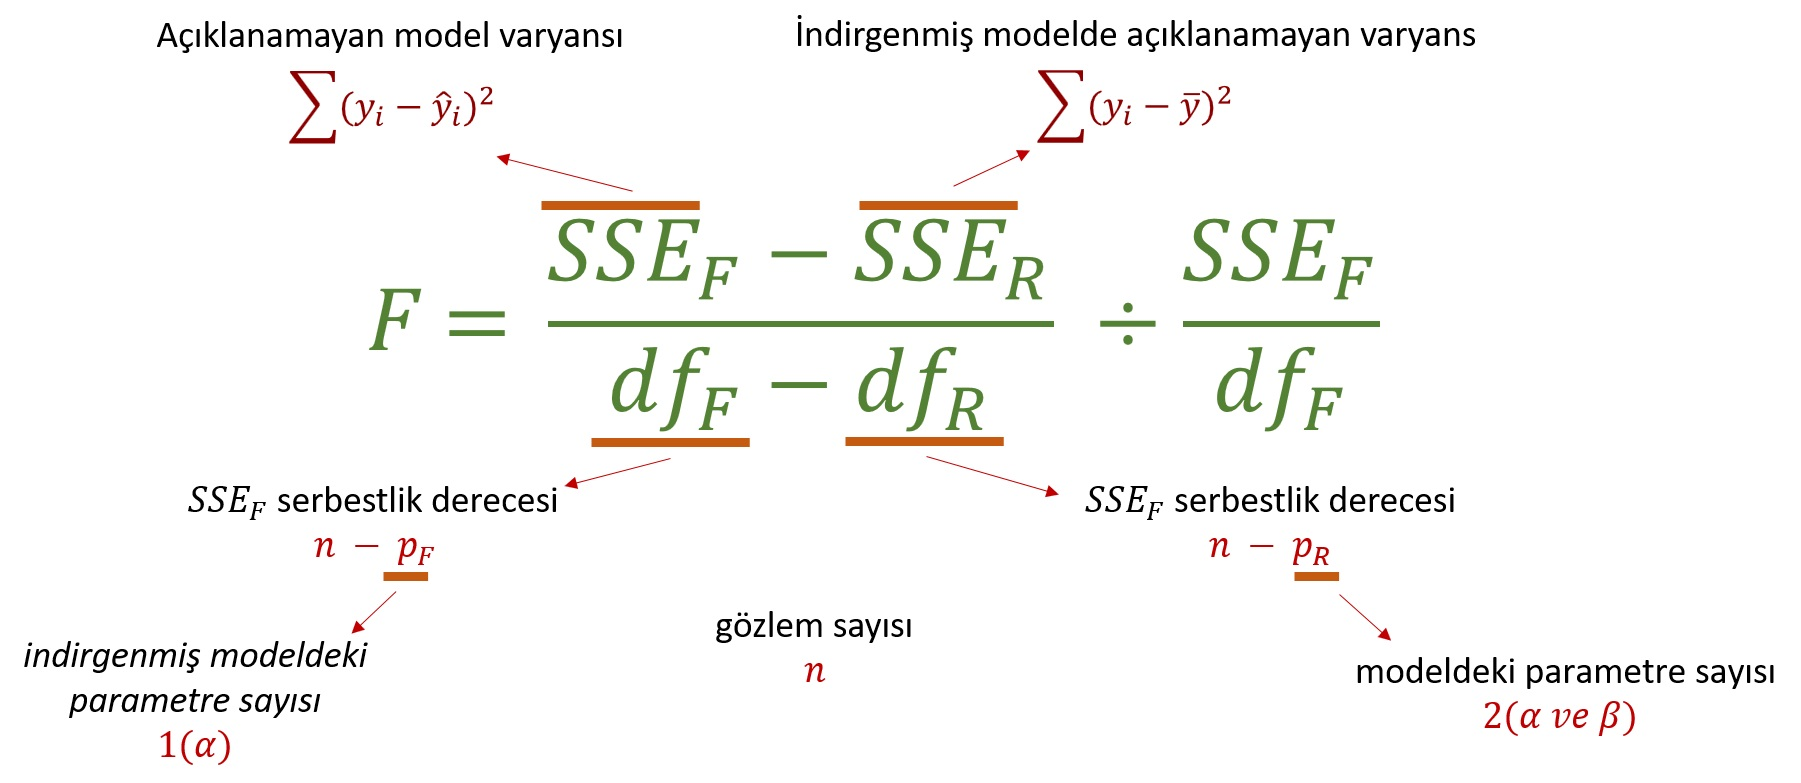

<br>Link-1:[sum of squared estimate of errors (SSE)](https://en.wikipedia.org/wiki/Residual_sum_of_squares)<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

%matplotlib inline
pd.options.display.float_format = "{:.3f}".format

insurance = pd.read_csv("insurance.csv")

insurance["is_male"] = pd.get_dummies(insurance.sex, drop_first = True)
insurance["is_smoker"] = pd.get_dummies(insurance.smoker, drop_first = True)

X1 = insurance[["age", "bmi", "is_male", "is_smoker"]]
Y = insurance.charges

X1 = sm.add_constant(X1)

results_model1 = sm.OLS(Y, X1)
results1 = results_model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     986.5
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:04:49   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1333   BIC:                         2.715e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.163e+04    947.267    -12.281      0.000   -1.35e+04   -9775.198
age          259.4532     11.942     21.727      0.000     236.027     282.880
bmi          323.0511     27.529     11.735      0.000     269.046     377.056
is_male     -109.0411    334.665     -0.326      0.745    -765.568     547.486
is_smoker   2.383e+04    414.186     57.544      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      299.394   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.639
Skew:                           1.212   Prob(JB):                    1.32e-154
Kurtosis:                       5.614   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Bu modelin F istatistiği 986.5'tir ve ilişkili p-değeri sıfıra çok yakındır. Bu, özelliklerimizin indirgenmiş modele bazı bilgiler eklediği ve modelimizin masrafları açıklamak için yararlı olduğu anlamına gelir. Ancak F testi, modelimizin ne kadar bilgi kattığını belirlememektedir. Bu, daha sonra tartışacağımız R-kare değerini gerektirir.

## 2 - Bir modelin eğitim kümesindeki performansını ölçmek
$R^2$ değeri muhtemelen doğrusal regresyon modelinde uyumun iyi olması için en yaygın ölçüdür. [...] Ancak, çok yüksek $R^2$ değerii, **overfitting**'in bir uyarı işaretidir. Yukarıdaki regresyon özeti tablosunda, tıbbi maliyetler modelimizin $R^2$ değerinin 0.747 olduğunu görüyoruz. Bu, modelimizin harcamalardaki varyansın %74.7'lik bir oranla açıkladığı, %25.3'ü ise açıklamadan bıraktığı anlamına gelir. İyileşme için hala bir yer olduğu sonucuna varabiliriz. Bir önceki Vücut kitle indeksi (vki) ve sigara_icer_mi etkileşimini içeren modeli tekrar uygulayalım:

In [2]:
insurance["bmi_smoker"] = insurance.bmi * insurance.is_smoker
X2 = insurance[["age", "bmi", "is_male", "is_smoker", "bmi_smoker"]]
X2 = sm.add_constant(X2)
results_model2 = sm.OLS(Y, X2)
results2 = results_model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1365.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:04:49   Log-Likelihood:                -13265.
No. Observations:                1338   AIC:                         2.654e+04
Df Residuals:                    1332   BIC:                         2.657e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2071.0773    840.644     -2.464      0.014   -3720.208    -421.946
age          266.3723      9.612     27.713      0.000     247.516     285.228
bmi            7.9686     25.044      0.318      0.750     -41.160      57.098
is_male     -473.4951    269.612     -1.756      0.079   -1002.406      55.415
is_smoker  -2.019e+04   1666.491    -12.117      0.000   -2.35e+04   -1.69e+04
bmi_smoker  1435.6081     53.242     26.964      0.000    1331.160    1540.056
==============================================================================
Omnibus:                      710.004   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4260.528
Skew:                           2.491   Prob(JB):                         0.00
Kurtosis:                      10.183   Cond. No.                         661.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print("İlk modelin R-kare değeri    : {:.3f}".format(results1.rsquared))
print(f"İkinci modelin R-kare değeri : {results2.rsquared:.3f}")

İlk modelin R-kare değeri    : 0.747
İkinci modelin R-kare değeri : 0.837


Bu modelin R-kare, önceki modelimizden daha yüksek olan 0.837'dir. Bu gelişme, **vki** ve **sigara_icer_mi** arasındaki etkileşimin, harcamalarda önceden açıklanmamış bir varyansı açıkladığını gösterir.

* Çok yüksek R-kare değeri, overfitting'in bir işareti olabilir. Eğer modelimiz veriler için çok karmaşıksa, o zaman eğitim kümesine overfit edebilir ve test kümesinde kötü bir iş çıkarabilir. Overfitting olduğunu tespit etmek için R-kare üzerinde anlaşılmış bir eşik yoktur. Bunun yerine, test ve eğitim verisindeki performans arasında bir karşılaştırma yapılmasını gerekir. **Eğer modelimiz, test kümesinde, eğitim kümesine göre anlamlı derecede daha kötü bir performans sergiliyorsa, o zaman overfitting'den şüphelenmeliyiz.** Bir sonraki derste test kümesindeki doğrusal regresyon modellerinin nasıl değerlendirileceğini tartışacağız.

* R-kare performansın doğası gereği yanlı bir tahminidir. Modele daha açıklayıcı değişkenlerin eklenmesi, daha yüksek R-kare değerleri almamız anlamına gelir. Bu, sesler veya rastgele veriler gibi alakasız değişkenleri bile içerir. Bu sorunu hafifletmek için genellikle R-kare yerine **adjusted (ayarlanmış) $R^2$** denilen bir ölçüm kullanırız. Ayarlanmış R-kare, R-kareyle aynı işi yapar, ancak modelde yer alan özelliklerin sayısına göre ayarlanır. Bu nedenle, **R-kare değeri yerine ayarlanmış R-kare değerine bakmak her zaman daha güvenlidir.**

**A note on negative $R^2$ values:** It is possible to get negative R-squared values for some models. In general terms, if a model is weaker than a straight horizontal line, then R-squared value becomes negative. This usually happens when a constant is not included in the model. Getting a negative value for R-squared means that your model does very poorly in explaning the target.

## 3 - COMPARING DIFFERENT MODELS
Comparing different models and chosing the best one is one of the essential practices in data science. Often, we try several models and evaluate their performance on a test set in order to determine the top performing one. However, **inference** is also a critical task when it comes to linear regression models. Unlike testing the predictive power, in inference, we care about the explanatory power of our models.

Throughout this lesson, we saw that we can measure the performance of our models on the training set using F-test or R-squared. Hence, both F-test and R-squared can be used in the comparison of different models. Unfortunately, the two metrics suffer from some drawbacks that make them inappropriate to use in certain situations.

Here we briefly outline how we can use F-test and R-squared in model comparison. Then, we introduce information criterias that we can also use to compare different models.

### 3.1 - Using F-test for model comparison
We can use an F-test to compare two models if one of them is nested within the other. That is, if the feature set in a model is a subset of the feature set of the other, then we can use F-test. In this case, we say that the model with **higher** F statistic is superior to the other one. However, if models are not nested, then using F-test may be misleading. It's quite sensitive to the normality of the error terms. If errors are not normally distributed, we should try other methods.

### 3.2 - Using R-squared for model comparision
We already saw that R-squared is biased as it tends to increase with the number of explanatory variables. So, instead of R-squared we can use adjusted R-squared. The higher adjusted R-squared, the better model explains the target variable.

### 3.3 - Using information criteria
Using information criteria is also a common way of comparing different models and selecting the best one. Here, we talk about two information criterias known as the **Akaike Information Criterion (AIC)** and **Bayesian Information Criterion (BIC)**. Both take into consideration the *sum of the squared errors (SSE)*, the *sample size* and the *number of parameters*.

The formula for **AIC** is:

$n*ln(SSE) - n*ln(n) + 2p$

and the formula for **BIC** is:

$n*ln(SSE) - n*ln(n) + p*ln(n)$

In both of these formulas, $n$ represents the sample size and $p$ represents the number of regression coefficients in the model (including the constant).

For both AIC and BIC, **the lower value the better**. Hence, we choose the model with the lowest AIC or BIC value. Although we can use any one of the two criterias, AIC is usually criticized for its tendency to overfit. In contrast, BIC penalizes the number of parameters more severely than AIC and hence favors more *parsimonious* models (that is, models with fewer parameters).

### 3.4. Which medical costs model is better?
For our first model, R-squared is 0.747, adjusted R-squared is 0.747, F-statistic is 986.5, AIC is 27.120 and BIC is 27.150 whereas for our second model, R-squared is 0.837, adjusted R-squared is 0.836, F-statistic is 1365, AIC is 26.540 and BIC is 26.570. According to all of the metrics, our second model seems better than the first one.